# Exploração dos dados obtidos do INMET de Mir. de Santana (2010 - 2025)

## Imports e Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Banco de dados/dados_83781_H_2010-01-01_2025-05-25.csv", skiprows=10, sep=";")
df = df.drop(["VENTO, DIRECAO HORARIA(codigo)", "CH (NUVENS ALTAS)(codigo)", "CL (NUVENS BAIXAS)(codigo)", "CM (NUVENS MEDIAS)(codigo)", "VISIBILIDADE, HORARIA(codigo)"], axis=1)

In [4]:
df.columns

Index(['Data Medicao', 'Hora Medicao', 'NEBULOSIDADE, HORARIA(décimos)',
       'PRECIPITACAO TOTAL, HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
       'TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'UMIDADE RELATIVA DO AR, HORARIA(%)', 'VENTO, VELOCIDADE HORARIA(m/s)'],
      dtype='object')

In [5]:
# Convert to datetime
df['Data'] = pd.to_datetime(
    df['Data Medicao'] + ' ' + df['Hora Medicao'].astype(str).str.zfill(4),
    format='%Y-%m-%d %H%M'
)
df = df.drop(['Data Medicao', 'Hora Medicao'], axis=1)

In [6]:
df = df.set_index('Data', drop=True)

## Interpolação

In [7]:
df_limpo = df.interpolate(method='time', limit_direction='both')

## Matriz de correlação

In [8]:
matrix_correl = df_limpo.corr('pearson')

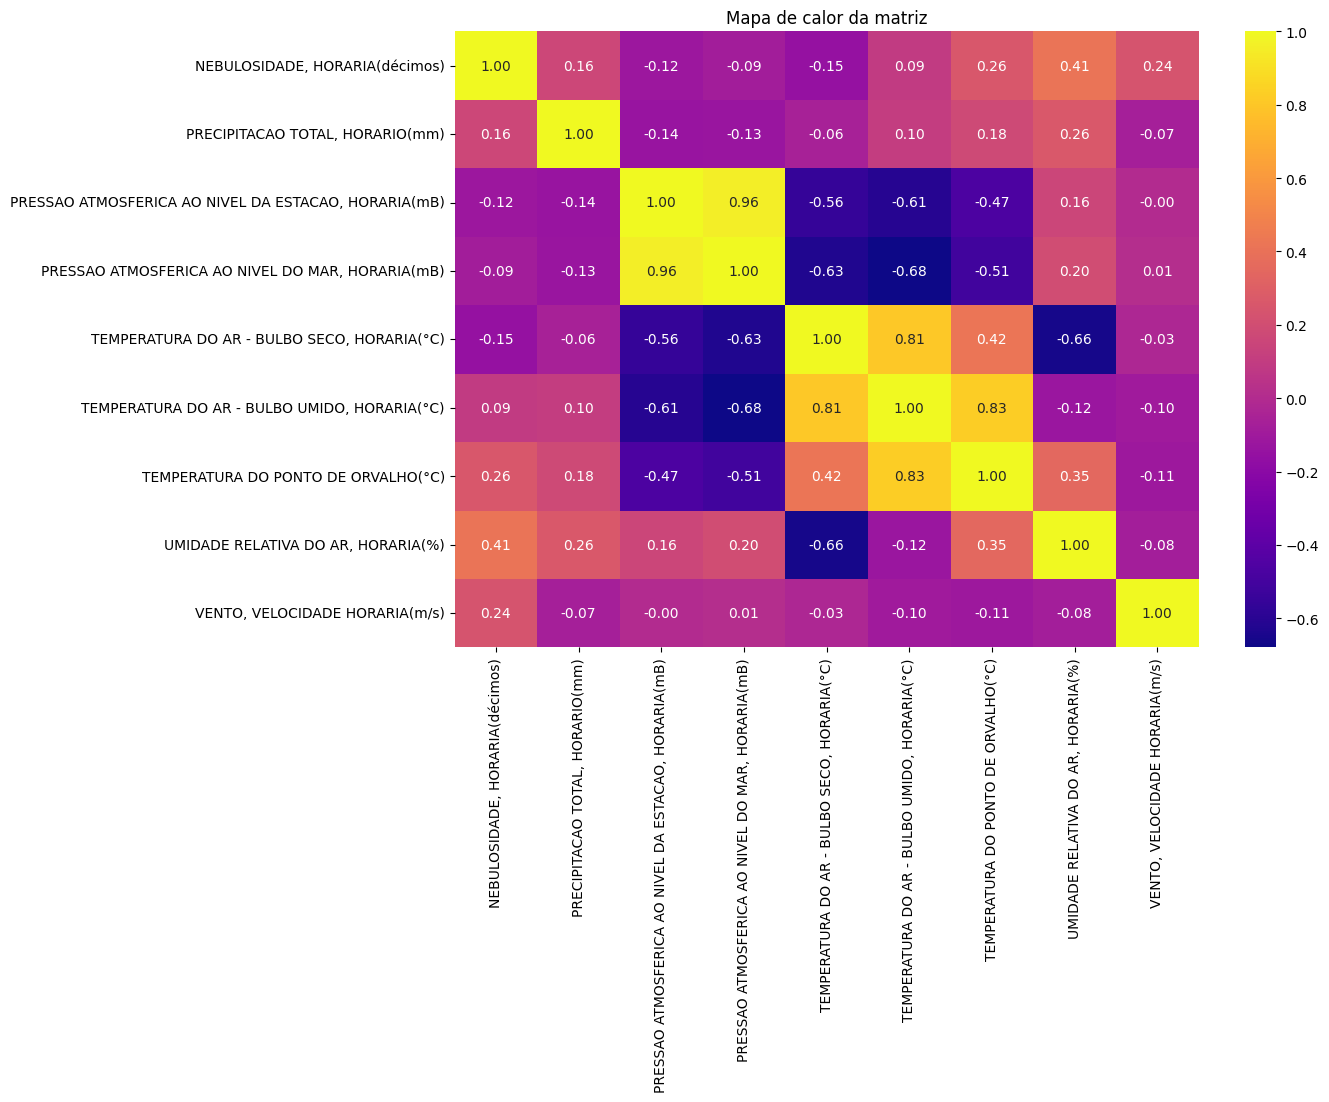

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_correl, annot=True, cmap='plasma', fmt=".2f")
plt.title('Mapa de calor da matriz')
plt.show()

Retira-se aqueles que têm baixa correlação com precipitação

In [11]:
df_final = df_limpo
for linha in matrix_correl['PRECIPITACAO TOTAL, HORARIO(mm)'].index:
    if abs(matrix_correl['PRECIPITACAO TOTAL, HORARIO(mm)'].loc[linha]) < 0.1:
        df_final = df_final.drop(linha, axis=1)

## Exportação dos dados

In [13]:
df_final.to_csv("Banco de dados/inmet_filtrado_santana.csv")